## 10.Pima Indian Diabetes3

### - EDA & Prediction (0.906)

<div style="text-align: right"> <b>Author : Kwang Myung Yu</b></div>
<div style="text-align: right\"> Initial upload: 2022.02.22 </div>
<div style="text-align: right\"> Last update: 2022.02.22</div>

- 출처 : https://www.kaggle.com/vincentlugat/pima-indians-diabetes-eda-prediction-0-906

In [1]:
import os
import sys
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings; warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

In [3]:
# Plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import squarify

In [4]:
# Data processing, metrics and modeling
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
import lightgbm as lgbm
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from yellowbrick.classifier import DiscriminationThreshold

In [5]:
# Stats
import scipy.stats as ss
from scipy import interp
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

In [7]:
# Time
from contextlib import contextmanager
@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

In [6]:
colors = ["#00798c", "#d1495b", '#edae49', '#66a182', '#4a4a4a',
          '#1a508b', '#e3120b', '#c5a880', '#9F5F80', '#6F9EAF',
          '#0278ae','#F39233', '#A7C5EB', '#54E346', '#ABCE74',
        '#d6b0b1', '#58391c', '#cdd0cb', '#ffb396', '#6930c3']
sns.color_palette(colors[:10])

[(0.0, 0.4745098039215686, 0.5490196078431373),
 (0.8196078431372549, 0.28627450980392155, 0.3568627450980392),
 (0.9294117647058824, 0.6823529411764706, 0.28627450980392155),
 (0.4, 0.6313725490196078, 0.5098039215686274),
 (0.2901960784313726, 0.2901960784313726, 0.2901960784313726),
 (0.10196078431372549, 0.3137254901960784, 0.5450980392156862),
 (0.8901960784313725, 0.07058823529411765, 0.043137254901960784),
 (0.7725490196078432, 0.6588235294117647, 0.5019607843137255),
 (0.6235294117647059, 0.37254901960784315, 0.5019607843137255),
 (0.43529411764705883, 0.6196078431372549, 0.6862745098039216)]

In [8]:
import os
print(os.listdir('data/diabetes'))

['Dataset of Diabetes .csv', 'diabetes.csv', 'diabetsbyMS.txt', '자료.txt']


데이터 설명  
북아메리카 피마 지역 원주민의 Type-2 당뇨병 결과 데이터입니다.  
보통 당뇨 원인으로 식습관과 유전을 꼽습니다.  
피마 지역은 고립된 지역에서 인디언 고유의 혈통이 지속돼 왔지만, 
20세기 후반에 들어서면서 서구화된 식습관으로 많은 당뇨 환자가 생겨났습니다.  
고립된 유전적 특성 때문에 당뇨학회에서는 피마 인디언의 당뇨병 자료에 대해 많은 연구를 했습니다.

**컬럼 정보**  
1. Number of times pregnant  

2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test  

3. Diastolic blood pressure (mm Hg)  

4. Triceps skin fold thickness (mm)  

5. 2-Hour serum insulin (mu U/ml)  

6. Body mass index (weight in kg/(height in m)^2)  

7. Diabetes pedigree function  

8. Age (years)  

9. Class variable (0 or 1)  

#### 1.2 Read data

In [10]:
data= pd.read_csv('data/diabetes/diabetes.csv')

### 2. Overview

In [11]:
display(data.info(), data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
data.shape

(768, 9)

Acccording to NIH, "Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy. Sometimes your body doesn’t make enough—or any—insulin or doesn’t use insulin well. Glucose then stays in your blood and doesn’t reach your cells.

Over time, having too much glucose in your blood can cause health problems. Although diabetes has no cure, you can take steps to manage your diabetes and stay healthy.

Sometimes people call diabetes “a touch of sugar” or “borderline diabetes.” These terms suggest that someone doesn’t really have diabetes or has a less serious case, but every case of diabetes is serious.

What are the different types of diabetes? The most common types of diabetes are type 1, type 2, and gestational diabetes.

Type 1 diabetes If you have type 1 diabetes, your body does not make insulin. Your immune system attacks and destroys the cells in your pancreas that make insulin. Type 1 diabetes is usually diagnosed in children and young adults, although it can appear at any age. People with type 1 diabetes need to take insulin every day to stay alive.

Type 2 diabetes If you have type 2 diabetes, your body does not make or use insulin well. You can develop type 2 diabetes at any age, even during childhood. However, this type of diabetes occurs most often in middle-aged and older people. Type 2 is the most common type of diabetes.

Gestational diabetes Gestational diabetes develops in some women when they are pregnant. Most of the time, this type of diabetes goes away after the baby is born. However, if you’ve had gestational diabetes, you have a greater chance of developing type 2 diabetes later in life. Sometimes diabetes diagnosed during pregnancy is actually type 2 diabetes.

Other types of diabetes Less common types include monogenic diabetes, which is an inherited form of diabetes, and cystic fibrosis-related diabetes ."

#### 2.2 Target

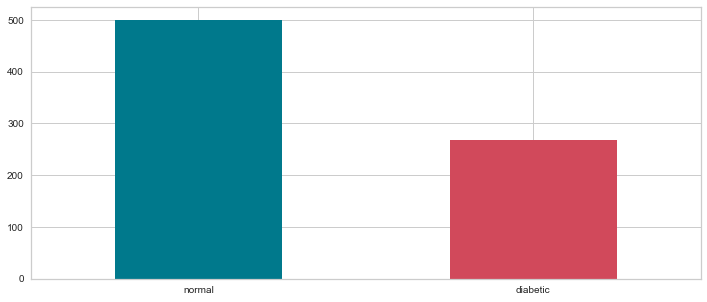

In [20]:
fig, ax = plt.subplots(figsize= (12, 5))
ax=data['Outcome'].value_counts().plot(kind = 'bar', color=colors, rot=0)
ax.set_xticklabels(['normal', 'diabetic'])
plt.show()

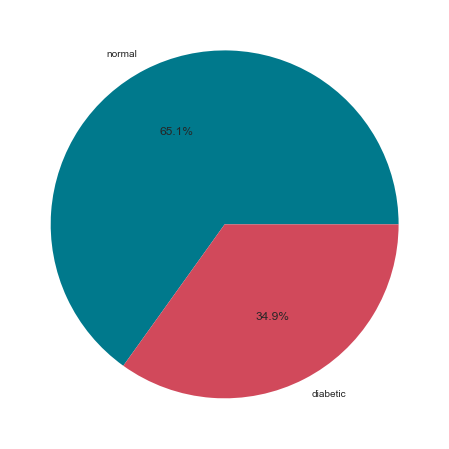

In [23]:
fig, ax = plt.subplots(figsize = (8, 8))
plt.pie(data['Outcome'].value_counts(), labels=['normal', 'diabetic'], colors=colors, autopct='%.1f%%')
plt.show()

#### 2.3 missing values

일단 null로 대체하자.

In [24]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = \
                data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [25]:
# Define missing plot to detect all missing values in dataset
def missing_plot(dataset, key) :
    null_feat = pd.DataFrame(len(dataset[key]) - dataset.isnull().sum(), columns = ['Count'])
    percentage_null = pd.DataFrame((len(dataset[key]) - (len(dataset[key]) - dataset.isnull().sum()))/len(dataset[key])*100, columns = ['Count'])
    percentage_null = percentage_null.round(2)

    trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, text = percentage_null['Count'],  textposition = 'auto',marker=dict(color = '#7EC0EE',
            line=dict(color='#000000',width=1.5)))

    layout = dict(title =  "Missing Values (count & %)")

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

In [26]:
# Plotting 
missing_plot(data, 'Outcome')

Missing values :

- Insulin = 48.7% - 374
- SkinThickness = 29.56% - 227
- BloodPressure = 4.56% - 35
- BMI = 1.43% - 11
- Glucose = 0.65% - 5

Text(0.5, 1.0, 'Overview Data Set')

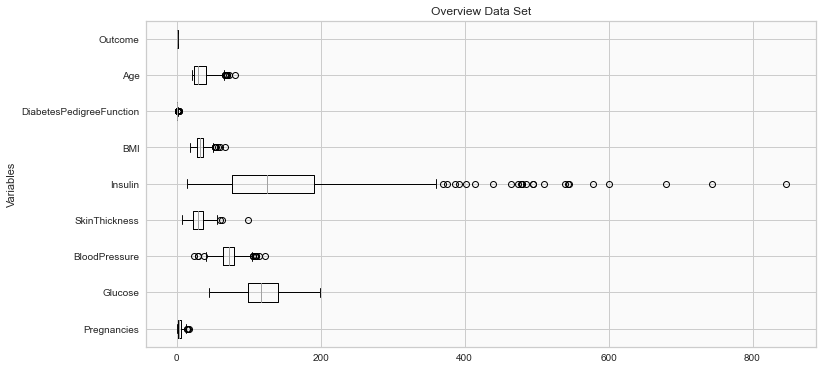

In [34]:
fig, ax = plt.subplots(figsize=(12, 6))
data.boxplot(vert=False, ax=ax)
ax.set_facecolor('#fafafa')
plt.ylabel('Variables')
plt.title("Overview Data Set")

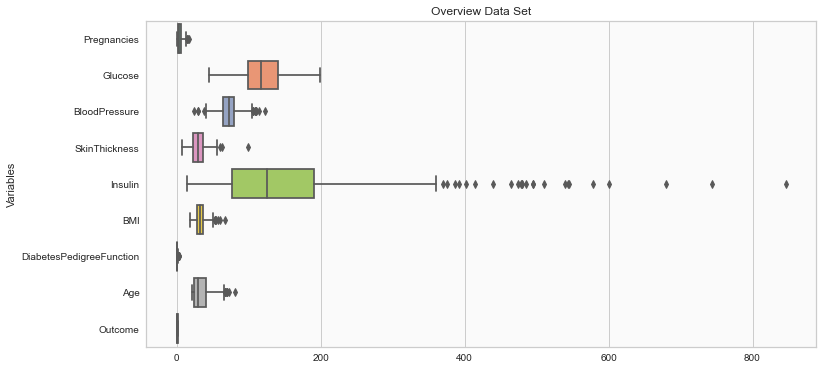

In [37]:
f, ax = plt.subplots(figsize=(12, 6))

ax.set_facecolor('#fafafa')
#ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = data, 
  orient = 'h', 
  palette = 'Set2')

결측치를 입력하기 위해 데이터 분포를 이해해야 한다.

나중에 LGBM 자동 결측치 처리를 보면 mean 처리를 했다.

### 3. Replace missing values and EDA

#### 3.1 Insulin  
Insulin : 2-Hour serum insulin (mu U/ml)

In [40]:
def plot_distribution(data_select, size_bin) :  
    # 2 datasets
    tmp1 = D[data_select]
    tmp2 = H[data_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['diabetic', 'healthy']
    colors = ['#FFD700', '#7EC0EE']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')
    
    fig['layout'].update(title = data_select)

    py.iplot(fig, filename = 'Density plot')


plot_distribution('Insulin', 0)   

<Figure size 864x360 with 0 Axes>

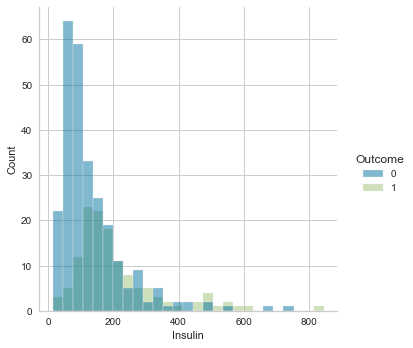

In [52]:
plt.figure(figsize=(12, 5))
ax = sns.displot(data=data, x='Insulin', hue='Outcome')

In [53]:
def median_target(var):   
    temp = data[data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [55]:
median_target('Insulin') # 중간 값 찾기

,Outcome,Insulin
0,0,102.5
1,1,169.5


결측치 처리 : 결과에 따라 다르게 중간 값을 처리한다.

In [56]:
data.loc[(data['Outcome'] == 0 ) & (data['Insulin'].isnull()), 'Insulin'] = 102.5
data.loc[(data['Outcome'] == 1 ) & (data['Insulin'].isnull()), 'Insulin'] = 169.5

#### 3.2. Glucose

Glucose : Plasma glucose concentration a 2 hours in an oral glucose tolerance test

In [57]:
plot_distribution('Glucose', 0)

In [58]:
median_target('Glucose')

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [59]:
data.loc[(data['Outcome'] == 0 ) & (data['Glucose'].isnull()), 'Glucose'] = 107
data.loc[(data['Outcome'] == 1 ) & (data['Glucose'].isnull()), 'Glucose'] = 140

#### 3.3. SkinThickness

- SkinThickness : Triceps skin fold thickness (mm)

In [60]:
plot_distribution('SkinThickness', 10)

In [61]:
median_target('SkinThickness')

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


In [62]:
data.loc[(data['Outcome'] == 0 ) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 27
data.loc[(data['Outcome'] == 1 ) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 32

- 건강한 사람은 27, 당뇨환자 32

#### 3.4. BloodPressure

- BloodPressure : Diastolic blood pressure (mm Hg)

In [63]:
plot_distribution('BloodPressure', 5)

In [64]:
median_target('BloodPressure')

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


In [65]:
data.loc[(data['Outcome'] == 0 ) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 70
data.loc[(data['Outcome'] == 1 ) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

#### 3.5 BMI

- BMI : Body mass index (weight in kg/(height in m)^2)

In [66]:
plot_distribution('BMI', 0)

In [67]:
median_target('BMI')

,Outcome,BMI
0,0,30.1
1,1,34.3


In [68]:
data.loc[(data['Outcome'] == 0 ) & (data['BMI'].isnull()), 'BMI'] = 30.1
data.loc[(data['Outcome'] == 1 ) & (data['BMI'].isnull()), 'BMI'] = 34.3

- Age : Age (years)
- DiabetesPedigreeFunction : Diabetes pedigree function
- Pregnancies : Number of times pregnant

In [69]:
#plot distribution 
plot_distribution('Age', 0)
plot_distribution('Pregnancies', 0)
plot_distribution('DiabetesPedigreeFunction', 0)

이제 결측치 확인

In [70]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 4. New features (16) and EDA

In [71]:
def plot_feat1_feat2(feat1, feat2) :  
    D = data[(data['Outcome'] != 0)]
    H = data[(data['Outcome'] == 0)]
    trace0 = go.Scatter(
        x = D[feat1],
        y = D[feat2],
        name = 'diabetic',
        mode = 'markers', 
        marker = dict(color = '#FFD700',
            line = dict(
                width = 1)))

    trace1 = go.Scatter(
        x = H[feat1],
        y = H[feat2],
        name = 'healthy',
        mode = 'markers',
        marker = dict(color = '#7EC0EE',
            line = dict(
                width = 1)))

    layout = dict(title = feat1 +" "+"vs"+" "+ feat2,
                  yaxis = dict(title = feat2,zeroline = False),
                  xaxis = dict(title = feat1, zeroline = False)
                 )

    plots = [trace0, trace1]

    fig = dict(data = plots, layout=layout)
    py.iplot(fig)

In [72]:
def barplot(var_select, sub) :
    tmp1 = data[(data['Outcome'] != 0)]
    tmp2 = data[(data['Outcome'] == 0)]
    tmp3 = pd.DataFrame(pd.crosstab(data[var_select],data['Outcome']), )
    tmp3['% diabetic'] = tmp3[1] / (tmp3[1] + tmp3[0]) * 100

    color=['lightskyblue','gold' ]
    trace1 = go.Bar(
        x=tmp1[var_select].value_counts().keys().tolist(),
        y=tmp1[var_select].value_counts().values.tolist(),
        text=tmp1[var_select].value_counts().values.tolist(),
        textposition = 'auto',
        name='diabetic',opacity = 0.8, marker=dict(
        color='gold',
        line=dict(color='#000000',width=1)))

    
    trace2 = go.Bar(
        x=tmp2[var_select].value_counts().keys().tolist(),
        y=tmp2[var_select].value_counts().values.tolist(),
        text=tmp2[var_select].value_counts().values.tolist(),
        textposition = 'auto',
        name='healthy', opacity = 0.8, marker=dict(
        color='lightskyblue',
        line=dict(color='#000000',width=1)))
    
    trace3 =  go.Scatter(   
        x=tmp3.index,
        y=tmp3['% diabetic'],
        yaxis = 'y2',
        name='% diabetic', opacity = 0.6, marker=dict(
        color='black',
        line=dict(color='#000000',width=0.5
        )))

    layout = dict(title =  str(var_select)+' '+(sub),
              xaxis=dict(), 
              yaxis=dict(title= 'Count'), 
              yaxis2=dict(range= [-0, 75], 
                          overlaying= 'y', 
                          anchor= 'x', 
                          side= 'right',
                          zeroline=False,
                          showgrid= False, 
                          title= '% diabetic'
                         ))

    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    py.iplot(fig)

In [73]:
# Define pie plot to visualize each variable repartition vs target modalities : Survived or Died (train)
def plot_pie(var_select, sub) :
    D = data[(data['Outcome'] != 0)]
    H = data[(data['Outcome'] == 0)]
    
    col =['Silver', 'mediumturquoise','#CF5C36','lightblue','magenta', '#FF5D73','#F2D7EE','mediumturquoise']
    
    trace1 = go.Pie(values  = D[var_select].value_counts().values.tolist(),
                    labels  = D[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hole = 0.5, 
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [.0,.48]),
                    name    = "Diabetic",
                    marker  = dict(colors = col, line = dict(width = 1.5)))
    trace2 = go.Pie(values  = H[var_select].value_counts().values.tolist(),
                    labels  = H[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hole = 0.5,
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 1.5)),
                    domain  = dict(x = [.52,1]),
                    name    = "Healthy" )

    layout = go.Layout(dict(title = var_select + " distribution by target <br>"+(sub),
                            annotations = [ dict(text = "Diabetic"+" : "+"268",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .22, y = -0.1),
                                            dict(text = "Healthy"+" : "+"500",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .8,y = -.1)]))
                                          

    fig  = go.Figure(data = [trace1,trace2],layout = layout)
    py.iplot(fig)

- Glucose and Age

In [74]:
plot_feat1_feat2('Glucose','Age')

- 건강한 사람은 age <=30, glucose <=120에 집중되어 있다.

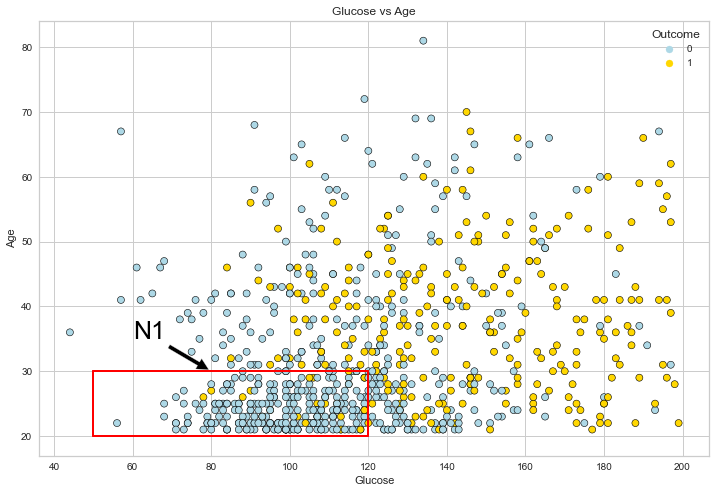

In [75]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = data['Glucose'], y = data['Age'], hue = "Outcome",
                    data = data, palette = palette, edgecolor=edgecolor)

plt.annotate('N1', size=25, color='black', xy=(80, 30), xytext=(60, 35),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([50, 120], [30, 30], linewidth=2, color = 'red')
plt.plot([120, 120], [20, 30], linewidth=2, color = 'red')
plt.plot([50, 120], [20, 20], linewidth=2, color = 'red')
plt.plot([50, 50], [20, 30], linewidth=2, color = 'red')
plt.title('Glucose vs Age')
plt.show()

N1 영역에 1을 표시하는 카테고리 변수를 추가하자.

In [76]:
data.loc[:,'N1']=0
data.loc[(data['Age']<=30) & (data['Glucose']<=120),'N1']=1

In [77]:
barplot('N1', ':Glucose <= 120 and Age <= 30')

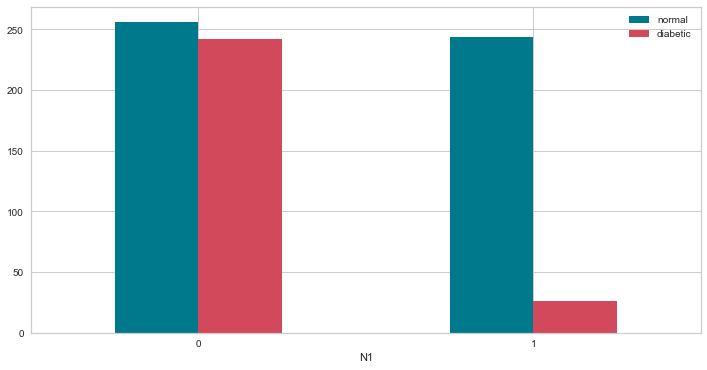

In [91]:
fig, ax = plt.subplots(figsize= (12, 6))
data.groupby(['N1', 'Outcome'])['Outcome'].count().unstack().plot(kind='bar', ax = ax, color=colors, rot = 0,
                                                                  label=['normal', 'diabetic'])
plt.legend(['normal', 'diabetic'])

In [92]:
plot_pie('N1', '(Glucose <= 120 and Age <= 30)')

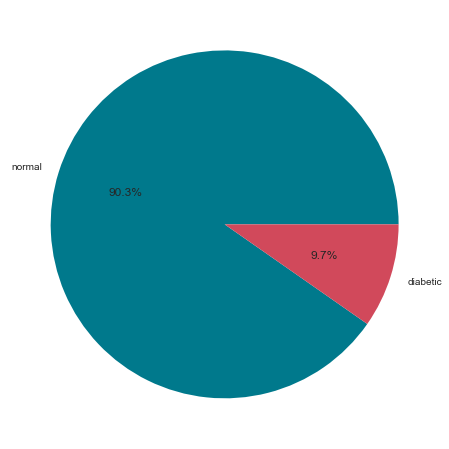

In [95]:
fig, ax = plt.subplots(figsize = (8, 8))
plt.pie(data.groupby(['N1', 'Outcome'])['Outcome'].count().unstack()[1], labels=['normal', 'diabetic'], colors=colors, autopct='%.1f%%')
plt.show()

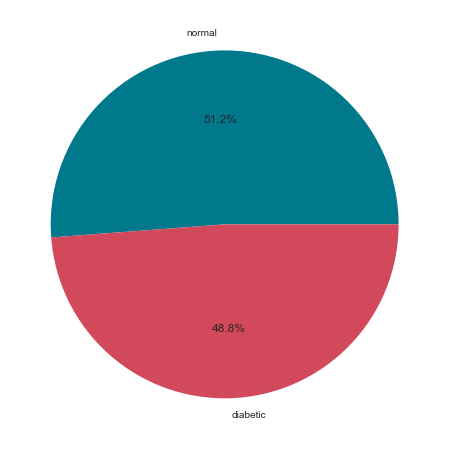

In [97]:
fig, ax = plt.subplots(figsize = (8, 8))
plt.pie(data.groupby(['N1', 'Outcome'])['Outcome'].count().unstack()[0], labels=['normal', 'diabetic'], 
        colors=colors, autopct='%.1f%%')
plt.show()

- BMI   
BMI는 몸무게 / 키^2 이다. 몸무게 단위는 kg, 키는 m이다.  
bmi 30 이상을 비만으로 부른다.

정상범위를 1로하고 n2 컬럼에 두자.

In [99]:
data.loc[:,'N2']=0
data.loc[(data['BMI']<=30),'N2']=1

In [100]:
barplot('N2', ': BMI <= 30')

In [101]:
plot_pie('N2', 'BMI <= 30')

- Pregnancies and Age

연령대와 나이의 상관성 검토.. 좋은듯

In [102]:
plot_feat1_feat2('Pregnancies','Age')

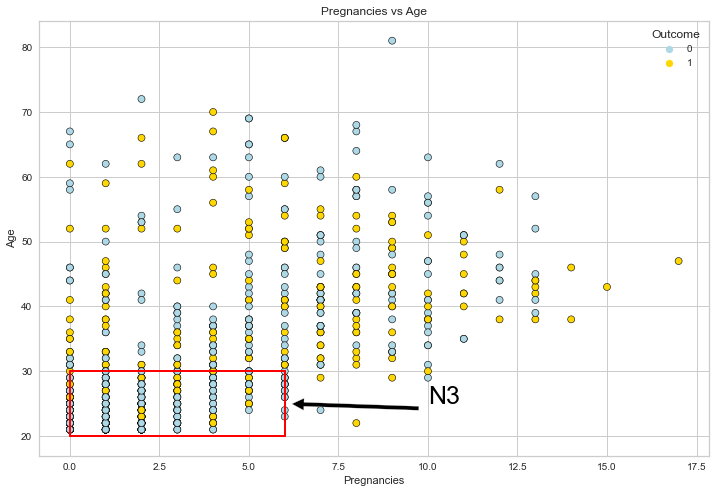

In [103]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = data['Pregnancies'], y = data['Age'], hue = "Outcome",
                    data = data, palette = palette, edgecolor=edgecolor)

plt.annotate('N3', size=25, color='black', xy=(6, 25), xytext=(10, 25),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([0, 6], [30, 30], linewidth=2, color = 'red')
plt.plot([6, 6], [20, 30], linewidth=2, color = 'red')
plt.plot([0, 6], [20, 20], linewidth=2, color = 'red')
plt.plot([0, 0], [20, 30], linewidth=2, color = 'red')
plt.title('Pregnancies vs Age')
plt.show()

- 저연령, 임신횟수가 낮을 수록 정상

In [104]:
data.loc[:,'N3']=0
data.loc[(data['Age']<=30) & (data['Pregnancies']<=6),'N3']=1

In [105]:
barplot('N3', ': Age <= 30 and Pregnancies <= 6')

In [106]:
plot_pie('N3', 'Age <= 30 and Pregnancies <= 6')

- Glucose and BloodPressure

In [107]:
plot_feat1_feat2('Glucose','BloodPressure')

- Healthy persons are concentrate with an blood pressure <= 80 and glucose <= 105

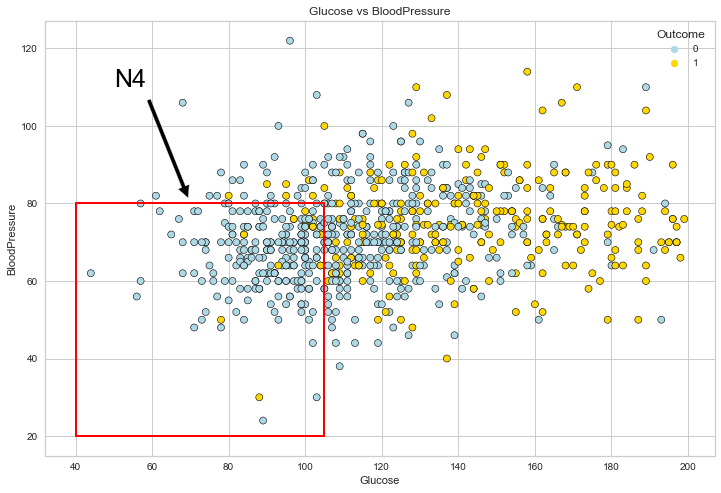

In [108]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = data['Glucose'], y = data['BloodPressure'], hue = "Outcome",
                    data = data, palette = palette, edgecolor=edgecolor)

plt.annotate('N4', size=25, color='black', xy=(70, 80), xytext=(50, 110),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([40, 105], [80, 80], linewidth=2, color = 'red')
plt.plot([40, 40], [20, 80], linewidth=2, color = 'red')
plt.plot([40, 105], [20, 20], linewidth=2, color = 'red')
plt.plot([105, 105], [20, 80], linewidth=2, color = 'red')
plt.title('Glucose vs BloodPressure')
plt.show()

In [109]:
data.loc[:,'N4']=0
data.loc[(data['Glucose']<=105) & (data['BloodPressure']<=80),'N4']=1

In [110]:
barplot('N4', ': Glucose <= 105 and BloodPressure <= 80')

In [111]:
plot_pie('N4', 'Glucose <= 105 and BloodPressure <= 80')

- SkinThickness

In [112]:
data.loc[:,'N5']=0
data.loc[(data['SkinThickness']<=20) ,'N5']=1

In [113]:
barplot('N5', ':SkinThickness <= 20')

In [114]:
plot_pie('N5', 'SkinThickness <= 20')

- SkinThickness and BMI

In [116]:
plot_feat1_feat2('SkinThickness','BMI')

- Healthy persons are concentrate with a BMI < 30 and skin thickness <= 20

In [117]:
data.loc[:,'N6']=0
data.loc[(data['BMI']<30) & (data['SkinThickness']<=20),'N6']=1

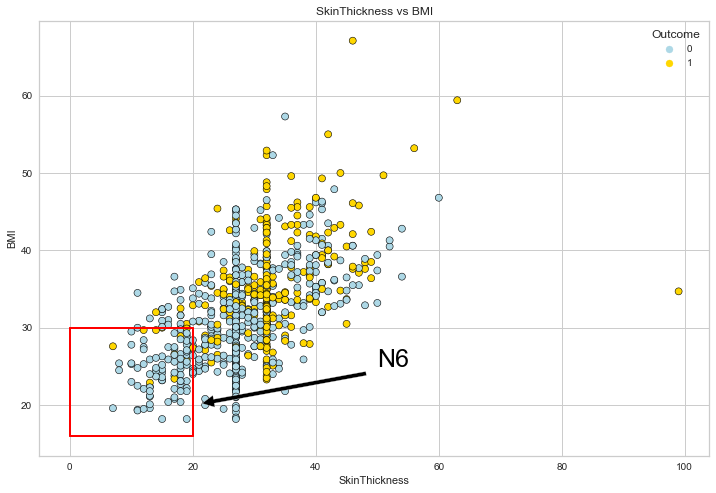

In [118]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = data['SkinThickness'], y = data['BMI'], hue = "Outcome",
                    data = data, palette = palette, edgecolor=edgecolor)

plt.annotate('N6', size=25, color='black', xy=(20, 20), xytext=(50, 25),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([0, 20], [30, 30], linewidth=2, color = 'red')
plt.plot([0, 0], [16, 30], linewidth=2, color = 'red')
plt.plot([0, 20], [16, 16], linewidth=2, color = 'red')
plt.plot([20, 20], [16, 30], linewidth=2, color = 'red')
plt.title('SkinThickness vs BMI')
plt.show()

In [119]:
barplot('N6', ': BMI < 30 and SkinThickness <= 20')

In [120]:
plot_pie('N6', 'BMI < 30 and SkinThickness <= 20')

- Glucose and BMI

In [121]:
plot_feat1_feat2('Glucose','BMI')

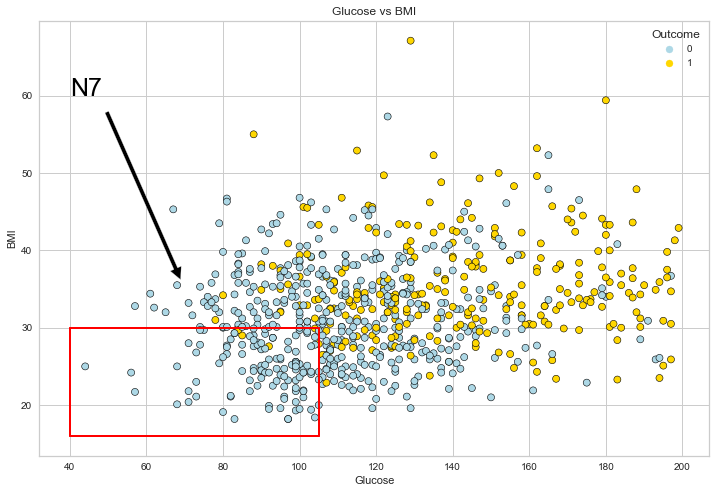

In [122]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = data['Glucose'], y = data['BMI'], hue = "Outcome",
                    data = data, palette = palette, edgecolor=edgecolor)

plt.annotate('N7', size=25, color='black', xy=(70, 35), xytext=(40, 60),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([105, 105], [16, 30], linewidth=2, color = 'red')
plt.plot([40, 40], [16, 30], linewidth=2, color = 'red')
plt.plot([40, 105], [16, 16], linewidth=2, color = 'red')
plt.plot([40, 105], [30, 30], linewidth=2, color = 'red')
plt.title('Glucose vs BMI')
plt.show()

In [123]:
data.loc[:,'N7']=0
data.loc[(data['Glucose']<=105) & (data['BMI']<=30),'N7']=1

In [124]:
barplot('N7', ': Glucose <= 105 and BMI <= 30')

In [125]:
plot_pie('N7', 'Glucose <= 105 and BMI <= 30')

- Insulin

In [126]:
plot_distribution('Insulin', 0)

In [127]:
data.loc[:,'N9']=0
data.loc[(data['Insulin']<200),'N9']=1

In [128]:
barplot('N9', ': Insulin < 200')

In [129]:
plot_pie('N9', 'Insulin < 200')

- BloodPressure

In [130]:
data.loc[:,'N10']=0
data.loc[(data['BloodPressure']<80),'N10']=1

In [131]:
barplot('N10', ': BloodPressure < 80')

In [132]:
plot_pie('N10', 'BloodPressure < 80')

- Pregnancies

In [133]:
plot_distribution('Pregnancies', 0)

In [134]:
data.loc[:,'N11']=0
data.loc[(data['Pregnancies']<4) & (data['Pregnancies']!=0) ,'N11']=1

In [135]:
barplot('N11', ': Pregnancies > 0 and < 4')

In [136]:
plot_pie('N11', 'Pregnancies > 0 and < 4')

- Others (중요)

In [137]:
data['N0'] = data['BMI'] * data['SkinThickness']

data['N8'] =  data['Pregnancies'] / data['Age']

data['N13'] = data['Glucose'] / data['DiabetesPedigreeFunction']

data['N12'] = data['Age'] * data['DiabetesPedigreeFunction']

data['N14'] = data['Age'] / data['Insulin']

In [138]:
D = data[(data['Outcome'] != 0)]
H = data[(data['Outcome'] == 0)]

In [139]:
plot_distribution('N0', 0)

In [140]:
data.loc[:,'N15']=0
data.loc[(data['N0']<1034) ,'N15']=1

In [141]:
barplot('N15', ': N0 < 1034')

In [142]:
plot_pie('N15', 'N0 < 1034')

### 5. Prepare dataset